<a href="https://colab.research.google.com/github/AnthonyM99/Seminario-Profesional/blob/master/Copia_de_lesson1_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


# Working with a dataset

##Load and explore the dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

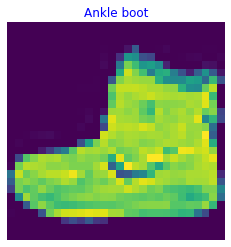

In [5]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]],color='b')
plt.axis('off')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [6]:
train_images = (train_images-np.mean(train_images)) / np.std(train_images)

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Explore final dataset

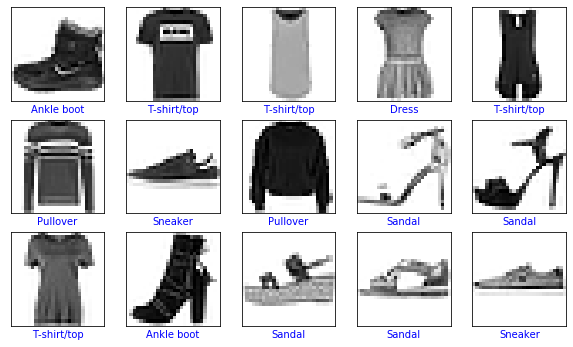

In [7]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],color='b')
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(392, activation='relu'),
    Dense(196, activation='relu'),
    Dense(98, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.2,
          epochs=15
          )

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 8s 175us/sample - loss: 0.4086 - accuracy: 0.8498 - val_loss: 0.4168 - val_accuracy: 0.8438
Epoch 2/15
48000/48000 [==============================] - 7s 151us/sample - loss: 0.3501 - accuracy: 0.8699 - val_loss: 0.3592 - val_accuracy: 0.8727
Epoch 3/15
48000/48000 [==============================] - 8s 166us/sample - loss: 0.3145 - accuracy: 0.8827 - val_loss: 0.3460 - val_accuracy: 0.8746
Epoch 4/15
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2959 - accuracy: 0.8888 - val_loss: 0.3343 - val_accuracy: 0.8823
Epoch 5/15
48000/48000 [==============================] - 6s 130us/sample - loss: 0.2743 - accuracy: 0.8974 - val_loss: 0.3514 - val_accuracy: 0.8767
Epoch 6/15
48000/48000 [==============================] - 6s 133us/sample - loss: 0.2586 - accuracy: 0.9035 - val_loss: 0.3201 - val_accuracy: 0.8879
Epoch 7/15
48000/48000 [==========================

# Evaluate

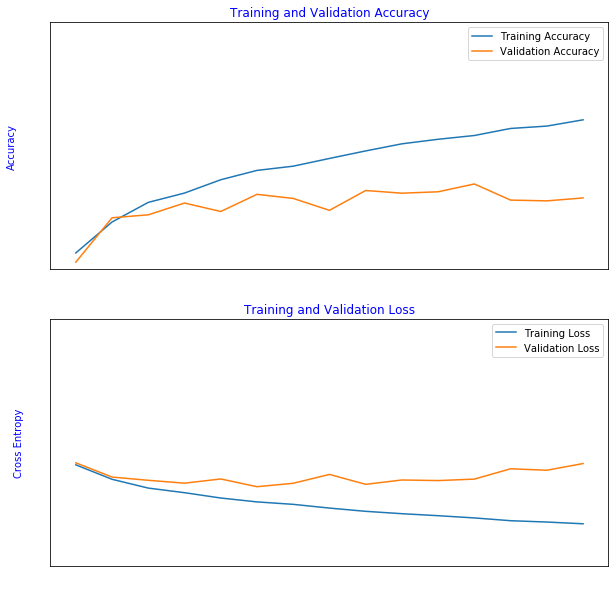

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy',color='b')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy',color='b')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy',color='b')
plt.ylim([0,1])
plt.title('Training and Validation Loss',color='b')
plt.xlabel('epoch')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 40.04265624467134
Accuracy: 0.7767


# Make predictions

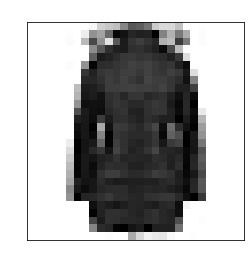


Predicted class is: Coat


In [16]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

65536/62225 [===============================] - 0s 0us/step

Predicted class is: Bag


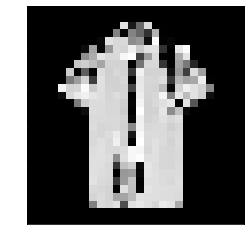

In [17]:
test_image = tf.keras.utils.get_file('shirt1.jpg','https://images-na.ssl-images-amazon.com/images/I/61QAKBgyY0L._UX679_.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])